# Demos

Demo 1: Object detection

Demo 2: Style transfer

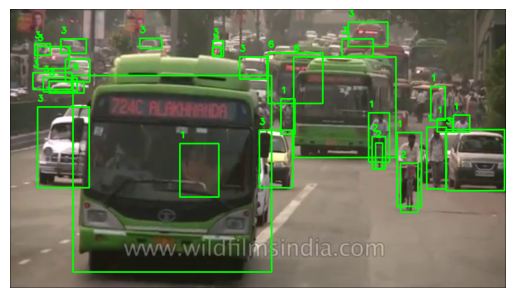

In [ ]:
#Demo 1
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models.detection import FasterRCNN, FasterRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.rpn import AnchorGenerator
import cv2
import matplotlib.pyplot as plt

# Define thedevice
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load the pretrained Faster R-CNN model with ResNet-50 backbone
model = models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.to(device)
model.eval()

# Load the video file
video_path = 'traffic-mini.mp4'
cap = cv2.VideoCapture(video_path)

# Define the transform to be applied to each frame
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Function to perform object detection on a single frame
def detect_objects(frame):
    # Convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Apply the transform
    input_tensor = transform(frame_rgb).unsqueeze(0).to(device)
    
    # Perform inference
    with torch.no_grad():
        output = model(input_tensor)[0]
    
    # Extract bounding boxes, labels, and scores
    boxes = output['boxes'].cpu().numpy().astype(int)
    labels = output['labels'].cpu().numpy()
    scores = output['scores'].cpu().numpy()
    
    # Draw bounding boxes and labels on the frame
    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Filter out low-confidence detections
            cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
            cv2.putText(frame, f'{label}', (box[0], box[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return frame


fig,ax = plt.subplots(1,1)
ax.axis('off')
hdisplay = display("", display_id=True)

# Loop through the video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Perform object detection on the current frames
    frame_with_detections = detect_objects(frame)
    
    # Display the frame with detections using Matplotlib
    ax.imshow(cv2.cvtColor(frame_with_detections, cv2.COLOR_BGR2RGB))
    hdisplay.update(fig)
    
    
# Release the video capture and close all windows
cap.release()
